In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
# from sklearn import tree

In [2]:
#data processing
df = pd.read_csv('insurance.csv')
df = df.replace(["male", "female"], [0, 1])
df = df.replace(["yes", "no"], [1, 0])
df = df.replace(["southeast", "southwest", "northeast", "northwest"], [0, 1, 2, 3])
#dropping age and sex feature
X = df.drop(["charges","age","sex","children"], axis = 1)
Y = df["charges"]
twoD_Y = np.array(Y)
twoD_X = np.array(X)

# 1.StratifiedKFold cross-validation

In [3]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, random_state=42)
print(X_test)

[[25.175  0.     2.   ]
 [30.02   0.     3.   ]
 [26.885  1.     3.   ]
 ...
 [21.4    0.     1.   ]
 [29.64   0.     2.   ]
 [32.56   0.     0.   ]]


In [4]:
#label to charge dataset from 0 to 6
scaled_Y = (preprocessing.scale(Y_train))
new_matrix = []
for i in range(len(scaled_Y)):
    if scaled_Y[i] <= (-1):
        scaled_Y[i] = 0
        new_matrix.append(0)
    elif scaled_Y[i] > (-1) and scaled_Y[i] <= 0:
        scaled_Y[i] = 1
        new_matrix.append(1)
    elif scaled_Y[i] > (0) and scaled_Y[i] <= 1:
        scaled_Y[i] = 2
        new_matrix.append(2)
    elif scaled_Y[i] > (1) and scaled_Y[i] <= 2:
        scaled_Y[i] = 3
        new_matrix.append(3)
    elif scaled_Y[i] > 2 and scaled_Y[i] <= 3:
        scaled_Y[i] = 4
        new_matrix.append(4)
    elif scaled_Y[i] > 3 and scaled_Y[i] <= 4:
        scaled_Y[i] = 5
        new_matrix.append(5)
    elif scaled_Y[i] > 4:
        scaled_Y[i] = 6
        new_matrix.append(6)
print(Counter(new_matrix))
new_matrix = np.array(new_matrix).reshape(-1, 1)
print(len(new_matrix))

Counter({1: 594, 2: 153, 3: 68, 4: 60, 0: 15, 5: 5, 6: 1})
896


In [5]:
#now use train data for cross_validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=42)

In [6]:
#Linear regression 10th iteration
reg_Linear = linear_model.LinearRegression()
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_Linear.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_Linear.predict(X_train[test_index])
        # The root mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break


Mean squared error: 6928.88


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [7]:
#Using ridge regression 10th iteration
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_ridge.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_ridge.predict(X_train[test_index])
        # The root mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break

Mean squared error: 6929.23


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [8]:
#Using Bayesian Ridge Regression 10th iteration
reg_bay = linear_model.BayesianRidge()
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_bay.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_bay.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break

Mean squared error: 6928.92


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [9]:
#predict using .....

In [10]:
#Lasso regression 10th iteration
reg_lasso = linear_model.Lasso(alpha = 0.1)
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_lasso.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_lasso.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break

Mean squared error: 6928.89


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [11]:
#predict using model

In [12]:
#Lasso Least Angle Regression 10th iteration
reg_Lasso_LAR = linear_model.LassoLars(alpha=10)
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 10:
        reg_Lasso_LAR.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_Lasso_LAR.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break

Mean squared error: 6973.37


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [13]:
#Random forest regressor 3rd
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(max_depth=2, random_state=0)
i = 0
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i== 3:
        reg_RF.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_RF.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break


Mean squared error: 5379.69


/home/rish/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [14]:
#Decision tree regressor 6th
from sklearn import tree
i = 0
reg_DT = tree.DecisionTreeRegressor()
for train_index, test_index in skf.split(X_train, new_matrix):
    i = i + 1
    if i == 6:
        reg_DT.fit(X_train[train_index], Y_train[train_index])
        Y_pred = reg_DT.predict(X_train[test_index])
        #         # The mean squared error
        print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_train[test_index], Y_pred)))
        break


Mean squared error: 6468.61


/home/rish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [15]:
model_vs_err1 = {}
model_vs_err1.update({"DecisionTreeRegressor" : sqrt(mean_squared_error(Y_test, reg_DT.predict(X_test)))})
model_vs_err1.update({"RandomForestRegressor" : sqrt(mean_squared_error(Y_test, reg_RF.predict(X_test)))})
model_vs_err1.update({"LassoLars" : sqrt(mean_squared_error(Y_test, reg_Lasso_LAR.predict(X_test)))})
model_vs_err1.update({"Lasso" : sqrt(mean_squared_error(Y_test, reg_lasso.predict(X_test)))})
model_vs_err1.update({"BayesianRidge" : sqrt(mean_squared_error(Y_test, reg_bay.predict(X_test)))})
model_vs_err1.update({"Ridge" : sqrt(mean_squared_error(Y_test, reg_ridge.predict(X_test)))})
model_vs_err1.update({"LinearRegression" : sqrt(mean_squared_error(Y_test, reg_Linear.predict(X_test)))})
print(model_vs_err1)

{'DecisionTreeRegressor': 7833.940847609459, 'RandomForestRegressor': 5726.311445625651, 'LassoLars': 6896.929709608754, 'Lasso': 6863.206800831254, 'BayesianRidge': 6864.362415218042, 'Ridge': 6867.480417141119, 'LinearRegression': 6863.1925100333}


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err1.keys()), y=list(model_vs_err1.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs RMSE')
plt.show()

<Figure size 640x480 with 1 Axes>

# 2.Bootstrapping

In [17]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, random_state=42)

In [18]:
from sklearn.utils import resample
X_train_boot=[]
Y_train_boot=[]
for i in range (1,11):
    X_train_boot.append( resample(X_train,replace=True,random_state=i ))
    Y_train_boot.append(resample(Y_train,replace=True,random_state=i ))   
reg_Linear = linear_model.LinearRegression()

In [19]:
for i in range (0,10):
    reg_Linear.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_Linear.predict(X_test)
    # The root mean squared error
    print("root Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred))) 
# since best result is from i=8
reg_Linear.fit(X_train_boot[8], Y_train_boot[8])

root Mean squared error: 6900.29
root Mean squared error: 6917.79
root Mean squared error: 6858.30
root Mean squared error: 6851.01
root Mean squared error: 6899.24
root Mean squared error: 6905.81
root Mean squared error: 6870.81
root Mean squared error: 6862.40
root Mean squared error: 6854.64
root Mean squared error: 6864.71


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#Using ridge regression 10th iteration
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)
for i in range (0,10):
    reg_ridge.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_ridge.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_ridge.fit(X_train_boot[8], Y_train_boot[8])

Mean squared error: 6905.84
Mean squared error: 6926.34
Mean squared error: 6861.68
Mean squared error: 6849.98
Mean squared error: 6906.24
Mean squared error: 6910.95
Mean squared error: 6874.82
Mean squared error: 6866.00
Mean squared error: 6855.38
Mean squared error: 6868.38


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
#Using Bayesian Ridge Regression 10th iteration
reg_bay = linear_model.BayesianRidge()
i = 0
for i in range (0,10):
    reg_bay.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_bay.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_bay.fit(X_train_boot[8], Y_train_boot[8])

Mean squared error: 6901.84
Mean squared error: 6920.61
Mean squared error: 6859.14
Mean squared error: 6850.68
Mean squared error: 6901.54
Mean squared error: 6907.33
Mean squared error: 6871.87
Mean squared error: 6863.35
Mean squared error: 6854.77
Mean squared error: 6865.68


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [22]:
#Lasso regression 10th iteration
reg_lasso = linear_model.Lasso(alpha = 0.1)
for i in range (0,10):
    reg_lasso.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_lasso.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_lasso.fit(X_train_boot[8], Y_train_boot[8])

Mean squared error: 6900.30
Mean squared error: 6917.82
Mean squared error: 6858.31
Mean squared error: 6851.01
Mean squared error: 6899.26
Mean squared error: 6905.82
Mean squared error: 6870.82
Mean squared error: 6862.42
Mean squared error: 6854.64
Mean squared error: 6864.72


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
#Lasso Least Angle Regression 10th iteration
reg_Lasso_LAR = linear_model.LassoLars(alpha=10)
for i in range (0,10):
    reg_Lasso_LAR.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_Lasso_LAR.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_Lasso_LAR.fit(X_train_boot[8], Y_train_boot[8])

Mean squared error: 6942.21
Mean squared error: 6980.06
Mean squared error: 6896.80
Mean squared error: 6868.79
Mean squared error: 6947.53
Mean squared error: 6912.20
Mean squared error: 6916.23
Mean squared error: 6907.78
Mean squared error: 6883.73
Mean squared error: 6906.51


LassoLars(alpha=10, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [24]:
#Random forest regressor 3rd
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(max_depth=2, random_state=0)
for i in range (0,10):
    reg_RF.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_RF.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_RF.fit(X_train_boot[1], Y_train_boot[1])

Mean squared error: 5754.41
Mean squared error: 5764.64
Mean squared error: 5790.41
Mean squared error: 5792.63
Mean squared error: 5820.46
Mean squared error: 5773.07
Mean squared error: 5782.46
Mean squared error: 5812.54
Mean squared error: 5739.33
Mean squared error: 5762.00


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
#Decision tree regressor 6th
from sklearn import tree
reg_DT = tree.DecisionTreeRegressor()
for i in range (0,10):
    reg_DT.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = reg_DT.predict(X_test)
    # The root mean squared error
    print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test, Y_pred)))
# since best result is from i=8
reg_DT.fit(X_train_boot[6], Y_train_boot[6])

Mean squared error: 7809.94
Mean squared error: 8248.93
Mean squared error: 7902.04
Mean squared error: 8059.75
Mean squared error: 8520.78
Mean squared error: 8376.00
Mean squared error: 7656.58
Mean squared error: 7896.77
Mean squared error: 7973.28
Mean squared error: 7905.04


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [26]:
model_vs_err2 = {}
model_vs_err2.update({"DecisionTreeRegressor" : sqrt(mean_squared_error(Y_test, reg_DT.predict(X_test)))})
model_vs_err2.update({"RandomForestRegressor" : sqrt(mean_squared_error(Y_test, reg_RF.predict(X_test)))})
model_vs_err2.update({"LassoLars" : sqrt(mean_squared_error(Y_test, reg_Lasso_LAR.predict(X_test)))})
model_vs_err2.update({"Lasso" : sqrt(mean_squared_error(Y_test, reg_lasso.predict(X_test)))})
model_vs_err2.update({"BayesianRidge" : sqrt(mean_squared_error(Y_test, reg_bay.predict(X_test)))})
model_vs_err2.update({"Ridge" : sqrt(mean_squared_error(Y_test, reg_ridge.predict(X_test)))})
model_vs_err2.update({"LinearRegression" : sqrt(mean_squared_error(Y_test, reg_Linear.predict(X_test)))})
print(model_vs_err2)

{'DecisionTreeRegressor': 7662.0416175171185, 'RandomForestRegressor': 5764.641756992255, 'LassoLars': 6883.730086728672, 'Lasso': 6854.641411854774, 'BayesianRidge': 6854.7722276777695, 'Ridge': 6855.380054176457, 'LinearRegression': 6854.635481413269}


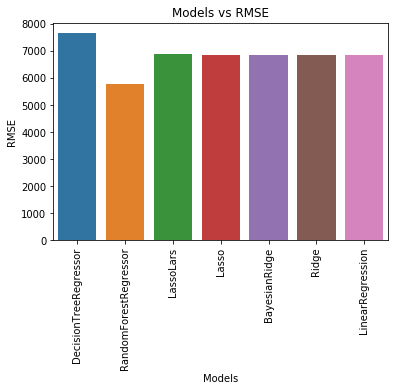

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err2.keys()), y=list(model_vs_err2.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs RMSE')
plt.show()

# 3.Holdout method

In [28]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, random_state=42)

In [29]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)

In [30]:
#Linear regression 10th iteration
reg_Linear = linear_model.LinearRegression()
reg_Linear.fit(X_train_c, Y_train_c)
Y_pred = reg_Linear.predict(X_test_c)
# The root mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 7265.56


In [31]:
#Using ridge regression 10th iteration
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(X_train_c, Y_train_c)
Y_pred = reg_ridge.predict(X_test_c)
# The root mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 7258.09


In [32]:
#Using Bayesian Ridge Regression 10th iteration
reg_bay = linear_model.BayesianRidge()
reg_bay.fit(X_train_c, Y_train_c)
Y_pred = reg_bay.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 7263.40


In [33]:
#Lasso regression 10th iteration
reg_lasso = linear_model.Lasso(alpha = 0.1)
reg_lasso.fit(X_train_c, Y_train_c)
Y_pred = reg_lasso.predict(X_test_c)
# The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 7265.53


In [34]:
#Lasso Least Angle Regression 10th iteration
reg_Lasso_LAR = linear_model.LassoLars(alpha=10)
reg_Lasso_LAR.fit(X_train_c, Y_train_c)
Y_pred = reg_Lasso_LAR.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 7216.90


In [35]:
#Random forest regressor 3rd
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(max_depth=2, random_state=0)
reg_RF.fit(X_train_c, Y_train_c)
Y_pred = reg_RF.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 5953.11


In [36]:
#Decision tree regressor 6th
from sklearn import tree
reg_DT = tree.DecisionTreeRegressor()
reg_DT.fit(X_train_c, Y_train_c)
Y_pred = reg_DT.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 8562.20


In [37]:
model_vs_err3 = {}
model_vs_err3.update({"DecisionTreeRegressor" : sqrt(mean_squared_error(Y_test, reg_DT.predict(X_test)))})
model_vs_err3.update({"RandomForestRegressor" : sqrt(mean_squared_error(Y_test, reg_RF.predict(X_test)))})
model_vs_err3.update({"LassoLars" : sqrt(mean_squared_error(Y_test, reg_Lasso_LAR.predict(X_test)))})
model_vs_err3.update({"Lasso" : sqrt(mean_squared_error(Y_test, reg_lasso.predict(X_test)))})
model_vs_err3.update({"BayesianRidge" : sqrt(mean_squared_error(Y_test, reg_bay.predict(X_test)))})
model_vs_err3.update({"Ridge" : sqrt(mean_squared_error(Y_test, reg_ridge.predict(X_test)))})
model_vs_err3.update({"LinearRegression" : sqrt(mean_squared_error(Y_test, reg_Linear.predict(X_test)))})
print(model_vs_err3)

{'DecisionTreeRegressor': 7817.869280801068, 'RandomForestRegressor': 5747.401653471618, 'LassoLars': 6872.584575634881, 'Lasso': 6869.255851794486, 'BayesianRidge': 6870.1523033939, 'Ridge': 6873.00988721531, 'LinearRegression': 6869.251035438516}


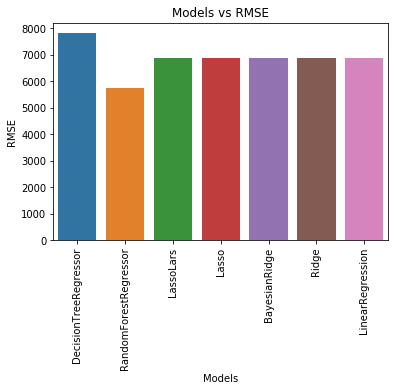

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err3.keys()), y=list(model_vs_err3.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs RMSE')
plt.show()

# Stratified holdout 

In [39]:
#label to charge dataset from 0 to 6
scaled_Y = (preprocessing.scale(Y))
new_matrix = []
for i in range(len(scaled_Y)):
    if scaled_Y[i] <= (-1):
        scaled_Y[i] = 0
        new_matrix.append(0)
    elif scaled_Y[i] > (-1) and scaled_Y[i] <= 0:
        scaled_Y[i] = 1
        new_matrix.append(1)
    elif scaled_Y[i] > (0) and scaled_Y[i] <= 1:
        scaled_Y[i] = 2
        new_matrix.append(2)
    elif scaled_Y[i] > (1) and scaled_Y[i] <= 2:
        scaled_Y[i] = 3
        new_matrix.append(3)
    elif scaled_Y[i] > 2 and scaled_Y[i] <= 3:
        scaled_Y[i] = 4
        new_matrix.append(4)
    elif scaled_Y[i] > 3 and scaled_Y[i] <= 4:
        scaled_Y[i] = 5
        new_matrix.append(5)
    elif scaled_Y[i] > 4:
        scaled_Y[i] = 6
        new_matrix.append(6)
print(Counter(new_matrix))
new_matrix = np.array(new_matrix).reshape(-1, 1)
print(len(new_matrix))

Counter({1: 908, 2: 222, 4: 101, 3: 90, 0: 10, 5: 5, 6: 2})
1338


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, stratify=new_matrix)

In [41]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(twoD_X, twoD_Y, test_size=0.33)

In [42]:
#Linear regression 10th iteration
reg_Linear = linear_model.LinearRegression()
reg_Linear.fit(X_train_c, Y_train_c)
Y_pred = reg_Linear.predict(X_test_c)
# The root mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 7141.10


In [43]:
#Using ridge regression 10th iteration
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(X_train_c, Y_train_c)
Y_pred = reg_ridge.predict(X_test_c)
# The root mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 7145.69


In [44]:
#Using Bayesian Ridge Regression 10th iteration
reg_bay = linear_model.BayesianRidge()
reg_bay.fit(X_train_c, Y_train_c)
Y_pred = reg_bay.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 7142.33


In [45]:
#Lasso regression 10th iteration
reg_lasso = linear_model.Lasso(alpha = 0.1)
reg_lasso.fit(X_train_c, Y_train_c)
Y_pred = reg_lasso.predict(X_test_c)
# The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))


Mean squared error: 7141.12


In [46]:
#Lasso Least Angle Regression 10th iteration
reg_Lasso_LAR = linear_model.LassoLars(alpha=10)
reg_Lasso_LAR.fit(X_train_c, Y_train_c)
Y_pred = reg_Lasso_LAR.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 7153.98


In [47]:
#Random forest regressor 3rd
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(max_depth=2, random_state=0)
reg_RF.fit(X_train_c, Y_train_c)
Y_pred = reg_RF.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 5888.47


In [48]:
#Decision tree regressor 6th
from sklearn import tree
reg_DT = tree.DecisionTreeRegressor()
reg_DT.fit(X_train_c, Y_train_c)
Y_pred = reg_DT.predict(X_test_c)
#         # The mean squared error
print("Mean squared error: %.2f"% sqrt(mean_squared_error(Y_test_c, Y_pred)))

Mean squared error: 7760.92


In [49]:
model_vs_err4 = {}
model_vs_err4.update({"DecisionTreeRegressor" : sqrt(mean_squared_error(Y_test, reg_DT.predict(X_test)))})
model_vs_err4.update({"RandomForestRegressor" : sqrt(mean_squared_error(Y_test, reg_RF.predict(X_test)))})
model_vs_err4.update({"LassoLars" : sqrt(mean_squared_error(Y_test, reg_Lasso_LAR.predict(X_test)))})
model_vs_err4.update({"Lasso" : sqrt(mean_squared_error(Y_test, reg_lasso.predict(X_test)))})
model_vs_err4.update({"BayesianRidge" : sqrt(mean_squared_error(Y_test, reg_bay.predict(X_test)))})
model_vs_err4.update({"Ridge" : sqrt(mean_squared_error(Y_test, reg_ridge.predict(X_test)))})
model_vs_err4.update({"LinearRegression" : sqrt(mean_squared_error(Y_test, reg_Linear.predict(X_test)))})
print(model_vs_err4)

{'DecisionTreeRegressor': 5391.973144956472, 'RandomForestRegressor': 6060.909265260944, 'LassoLars': 7325.8525417753635, 'Lasso': 7313.604618283963, 'BayesianRidge': 7313.835889567832, 'Ridge': 7314.640702657801, 'LinearRegression': 7313.601421870188}


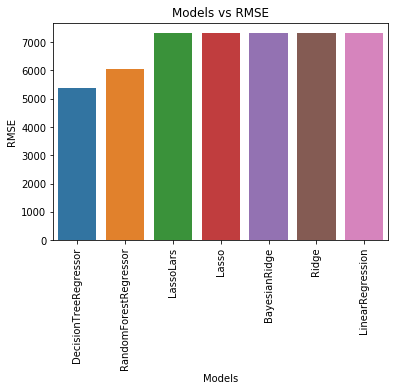

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err4.keys()), y=list(model_vs_err4.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs RMSE')
plt.show()

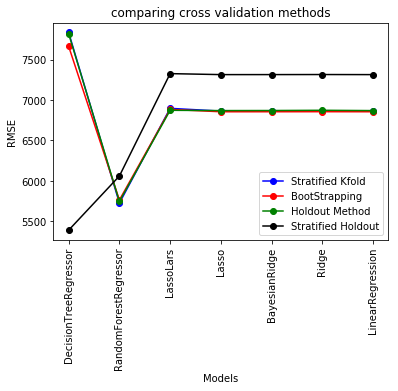

In [51]:
# plot
plt.plot( model_vs_err1.keys(), model_vs_err1.values(), marker='.', markersize=12, color='blue', label="Stratified Kfold")
plt.plot( model_vs_err2.keys(), model_vs_err2.values(), marker='.', markersize=12, color='red', label="BootStrapping")
plt.plot( model_vs_err3.keys(), model_vs_err3.values(), marker='.', markersize=12, color='green', label="Holdout Method")
plt.plot( model_vs_err4.keys(), model_vs_err4.values(), marker='.', markersize=12, color='black', label="Stratified Holdout")
plt.legend()
plt.xticks(rotation= 90)
plt.title('comparing cross validation methods')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()